## Practical 

## 1.1 CMIP6 data

In this practical you'll be playing around with CMIP6 data. 

### 1.1.1. What is CMIP6
CMIP6 refers to the Sixth Phase of the Coupled Model Intercomparison Project. It is a framework for coordinating and promoting the systematic evaluation of Earth System Models (ESMs) and their components. 
Basically all modelling groups who develop ESMs do the same simulations with the same input (forcing!), and then we compare the results. 



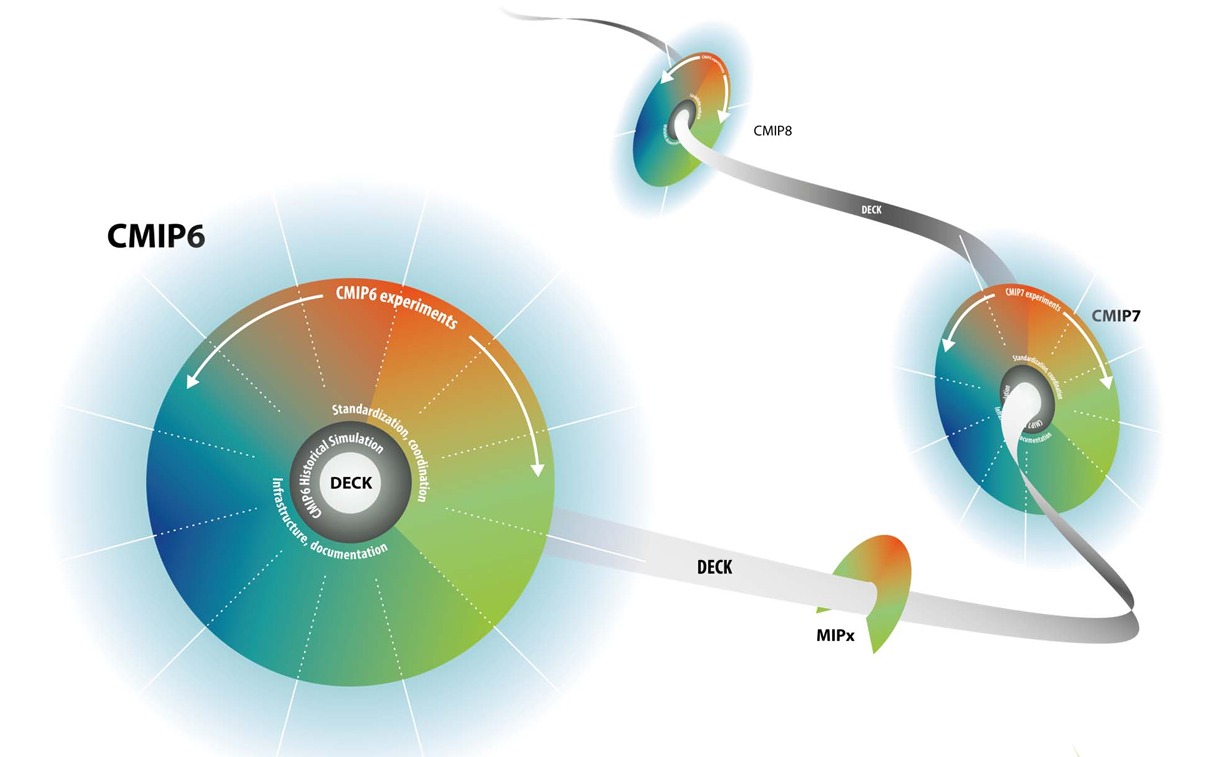

Source:https://www.wcrp-climate.org/wgcm-cmip/wgcm-cmip6


- Project under World Climate Research Programme (WCRP) 
- Since 1995 CMIP has coordinated climate model experiments 
- Defines common experiment protocols, forcings and output. 
- More than 30 model groups participate'


### 1.1.2 Useful links (you don't need them for this exercise):
- Database for data request: http://clipc-services.ceda.ac.uk/dreq/index.html
    - Search for variable names: http://clipc-services.ceda.ac.uk/dreq/mipVars.html
    - Search for experiments: http://clipc-services.ceda.ac.uk/dreq/experiments.html
- Overview: https://www.wcrp-climate.org/wgcm-cmip/wgcm-cmip6
- ES-DOCs: https://search.es-doc.org/


- GMD special issue with articles explaining all MIPs in CMIP6 :
https://www.geosci-model-dev.net/special_issue590.html
- General CMIP6 website https://www.wcrp-climate.org/wgcm-cmip/wgcm-cmip6
- Guidance documents: (https://pcmdi.llnl.gov/CMIP6/)
- Emissions/Forcing datasets (https://esgf-node.llnl.gov/projects/input4mips/)
- Model and experiment documentation (https://search.es-doc.org/)
- Emission visualising: https://eccad.aeris-data.fr

### 1.1.3. What's so great about CMIP?
- All data is open and free to use
- Homogenized and standardized outputs
- Same variable name
- Same experiments

### 1.1.4. Experiments (DECK)
The core of CMIP6 are the DECK experiments, which stands for Diagnostic, Evaluation and Characterization of Klima. 
The core experiments are listed in the table below. 

<img src="https://user-images.githubusercontent.com/17406708/139691209-ec237004-637b-4947-bb12-104d78a2fe44.png" alt="drawing" width="800"/>


Each experiment has a purpose. In this exercise we will primarily look at the historical simulations, which are often used to evaluate the models and their performancs. In these simulations, we try to feed the models emissions and forcing as close to reality as possible. 

## 1.2 Coding 
You will mostly be given the the code needed to read the data, and will mainly do the plotting on your own. It might though, be good to know that we are mainly using a python package called **xarray** to read and do calculations on the dataset. [Xarray](https://xarray.dev/) is excellent for dealing with multidimensional datasets (like latitude, longitude, time, height) and is very similar (and built on) [Pandas](https://pandas.pydata.org/) for those who might know it. Some introduction follows below. 

## 1.3 File format: NetCDF

A netCDF (Network Common Data Form) file is a self-describing, machine-independent data format commonly used in scientific communities, especially in Earth and atmospheric sciences. It stores multi-dimensional arrays of scientific data (e.g., variables such as temperature, pressure, or precipitation) along with metadata that describes the data (e.g., units, spatial and temporal coordinates, variable names, etc.).

NetCDF files are designed to be easily accessible and usable by a wide range of software programs, including specialized scientific software and general-purpose data analysis tools. This makes netCDF a convenient format for sharing and exchanging scientific data, and it is widely used in many fields, including climate science, atmospheric science, oceanography, and others. The netCDF format is maintained by the Unidata Program at the University Corporation for Atmospheric Research (UCAR).

## 1.4 ACTION POINT: 

### ALTERNATIVE 1: Install neccesary packages on your computer

In order to do this exercise, you will need to install the following packages on your computer:

From the default conda:
- xarray 
- intake
- s3fs

from conda-forge:
- intake-esm
- gcsfs
- zarr
- cartopy

You can for example do this by installing the conda environment in the file [environment.yml](environment.yml).

For example run in the terminal:
```bash
conda env create -f environment.yml
conda activate earth-analytics-python
```


**Download the HadCRUT dataset:** 
- Here is the download link: https://crudata.uea.ac.uk/cru/data/temperature/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc
- Put the data in the subfolder of this folder called 'Data'


### ALTERNATIVE 2: Download the data to your computer

The data you need is all collected here: https://stockholmuniversity.box.com/s/y2gm2knry1z1qz0ju9h3qa48l2l2rlge
Put all the data in the Data folder and copy and run the following code:
```python
ds_noresm = xr.open_dataset('Data/CMIP.NCC.NorESM2-LM.historical.Amon.gn.nc')
ds_cesm = xr.open_dataset('Data/CMIP.NCAR.CESM2-WACCM.historical.Amon.gn.nc')
```

**If you can use this step, you can skip step 2. "Read in the CMIP6 data"**

**We will do this together in the exercise session**

## 1.5 Some coding introduction: Xarray++

### 1.5.1 Open file
In this exercise you will be given code which reads the data directly from the database, but in general to read a netcdf file in xarray, you can run:

```python
import xarray as xr
ds = xr.open_dataset('path/to/netcdf/file.nc'
```


### Read data from PANGEO database

Pangeo is an open-source platform that provides tools and infrastructure for scalable and reproducible analysis of geoscience data. The Pangeo community aims to make it easier for researchers to work with large and complex datasets in the Earth sciences.

Pangeo Catalog is an open-source project to enumerate and organize cloud-optimized climate data stored across a variety of providers. In addition to offering various useful climate datasets in a consolidated location, the project also serves as a means of accessing public ESM data catalogs.

A lot (but not all) of the CMIP6 data can be found on the PANGEO database. 
See here for examples: https://gallery.pangeo.io/repos/pangeo-gallery/cmip6/index.html

Below you will see how to search and load data. If you want to load a variable which is not in the example below, you can search for with the CMIP variable search (use the standard name for example) and find the name under the "Variable" column. You can also search for different experiments than the historical one. 

- Search for variable names: http://clipc-services.ceda.ac.uk/dreq/mipVars.html
- Search for experiments: http://clipc-services.ceda.ac.uk/dreq/experiments.html


**NB: You do not need to understand what is going on in the loading of the data**

In [14]:
import s3fs
import xarray as xr
import intake
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

In [15]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

/Users/sarablichner/anaconda3/lib/python3.11/site-packages/intake_esm/cat.py:283: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(type)
/Users/sarablichner/anaconda3/lib/python3.11/site-packages/intake_esm/cat.py:283: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(type)
/Users/sarablichner/anaconda3/lib/python3.11/site-packages/intake_esm/cat.py:283: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(type)
/Users/sarablichner/anaconda3/lib/python3.11/site-packages/intake_esm/cat.py:283: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(type)
/Users/sarablichner/anaconda3/lib/python3.11/site-packages/intake_esm/cat.py:283: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(type)
/Users/sarablichner/anaconda3/lib/python3.11/site-packages/intake_esm/cat.py:283: FutureWa

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


#### Search for the variable: 
- **variable_id**: a list (format: ['var1','var2']) of variables you want to search for.
- **source_id**: These are the model names. 
- **experiment_id**: this is the experiment. It's probably best to keep to one at a time. 
- **member_id**: Member id's are used because some experiments have perturbed initial condition ensembles, meaning that they'll have slightly different meteorology. 


If you want to search for all models for example, just write  'source_id=None'.

The output tells you which input exists.

In [20]:
cat = col.search(variable_id=['od550aer'],
                 source_id=['CESM2-WACCM','CESM2','NorESM2-LM','MPI-ESM-1-2-HAM','E3SM-1-1-ECA'],
                 table_id=['AERmon'], 
                 experiment_id=['historical'], 
                 member_id=['r1i1p1f1'])
cat.df

/Users/sarablichner/anaconda3/lib/python3.11/site-packages/intake_esm/cat.py:283: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(type)
/Users/sarablichner/anaconda3/lib/python3.11/site-packages/intake_esm/cat.py:283: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(type)


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,AERmon,od550aer,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227
1,CMIP,NCAR,CESM2,historical,r1i1p1f1,AERmon,od550aer,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
2,CMIP,HAMMOZ-Consortium,MPI-ESM-1-2-HAM,historical,r1i1p1f1,AERmon,od550aer,gn,gs://cmip6/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ES...,NaN,20190627
3,CMIP,NCC,NorESM2-LM,historical,r1i1p1f1,AERmon,od550aer,gn,gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/historica...,NaN,20190815
4,CMIP,E3SM-Project,E3SM-1-1-ECA,historical,r1i1p1f1,AERmon,od550aer,gr,gs://cmip6/CMIP6/CMIP/E3SM-Project/E3SM-1-1-EC...,NaN,20200127


#### Read in variable:
One you are happy with your search for data above, use the below code to read it in. 
Make sure to not read too much data, as you don't have that much RAM or computing power and your kernell (notebook) will crash if you overload it. 

In [56]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True, },)

# Facilitate plotting of timeseries:
for k in dset_dict.keys():
    dset_dict[k]['time'] = dset_dict[k].indexes['time'].to_datetimeindex()
    for v in ['lat_bnds','lon_bnds','time_bnds','dcpp_init_year']:
        if v in dset_dict[k]:
            dset_dict[k] = dset_dict[k].drop(v)
        if 'dcpp_init_year' in dset_dict[k].dims:
            dset_dict[k] = dset_dict[k].isel(dcpp_init_year=0)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/var/folders/94/vwhfq3pn1gzf467zrfgldhbx4lgk1t/T/ipykernel_78366/736353451.py:1: DeprecationWarning: cdf_kwargs and zarr_kwargs are deprecated and will be removed in a future version. Please use xarray_open_kwargs instead.
  dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True, },)


drosdf
drosdf
drosdf
drosdf
drosdf


/var/folders/94/vwhfq3pn1gzf467zrfgldhbx4lgk1t/T/ipykernel_78366/736353451.py:5: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  dset_dict[k]['time'] = dset_dict[k].indexes['time'].to_datetimeindex()


ds_dict now contains a number of xarray datasets (you can google the format), which you can access as follows: 

In [57]:
print(dset_dict.keys())

dict_keys(['CMIP.NCC.NorESM2-LM.historical.AERmon.gn', 'CMIP.E3SM-Project.E3SM-1-1-ECA.historical.AERmon.gr', 'CMIP.NCAR.CESM2-WACCM.historical.AERmon.gn', 'CMIP.HAMMOZ-Consortium.MPI-ESM-1-2-HAM.historical.AERmon.gn', 'CMIP.NCAR.CESM2.historical.AERmon.gn'])


copy one of the keys above to get the dataset: 

In [59]:
ds_cesm = dset_dict['CMIP.NCAR.CESM2.historical.AERmon.gn']#.drop(['lat_bnds','lon_bnds','time_bnds'])
ds_cesm#.isel(dcpp_init_year=0)

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, member_id: 1, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) datetime64[ns] 1850-01-15T12:00:00 ... 2014-12-15T12:00:00
  * member_id  (member_id) object 'r1i1p1f1'
Data variables:
    od550aer   (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 307, 192, 288), meta=np.ndarray>
Attributes: (12/61)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    branch_time_in_parent:            219000.0
    case_id:                          15
    ...                               ...
    intake_esm_attrs:variable_id:     od550aer
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/NCAR/CESM2/histor...
    intake_esm_attrs:version:         20190308
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2.historical.AERmon.gn

In [60]:
ds_noresm = dset_dict['CMIP.NCC.NorESM2-LM.historical.AERmon.gn']
ds_noresm


<xarray.Dataset>
Dimensions:     (lat: 96, lon: 144, member_id: 1, time: 1980)
Coordinates:
  * lat         (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon         (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time        (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:0...
    wavelength  float64 ...
  * member_id   (member_id) object 'r1i1p1f1'
Data variables:
    od550aer    (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 990, 96, 144), meta=np.ndarray>
Attributes: (12/65)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    Hybrid-restart from year 1600-01-01 of ...
    branch_time:                      0.0
    branch_time_in_child:             0.0
    branch_time_in_parent:            430335.0
    ...                               ...
    intake_esm_attrs:variable_id:     od550aer
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/hi...
    intake_esm_attrs:version:         20190815
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCC.NorESM2-LM.historical.AERmon.gn

### Selecting a variable:

When you want to look at a specific variable in a dataset, you write 
```python
ds['name_of_variable']
```
followed by whatever operation you want. 

In [61]:
ds_cesm['od550aer']

<xarray.DataArray 'od550aer' (member_id: 1, time: 1980, lat: 192, lon: 288)>
dask.array<getitem, shape=(1, 1980, 192, 288), dtype=float32, chunksize=(1, 307, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) datetime64[ns] 1850-01-15T12:00:00 ... 2014-12-15T12:00:00
  * member_id  (member_id) object 'r1i1p1f1'
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        AOD from ambient aerosols (i.e., includes aerosol water)....
    description:    AOD from ambient aerosols (i.e., includes aerosol water)....
    frequency:      mon
    id:             od550aer
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Ambient Aerosol Optical Thickness at 550nm
    type:           real
    units:          1
    variable_id:    od550aer

### 1.5.5. Selecting subsets of the data

Sometimes we might want to look at a particular period for example, or just one day. In xarray we use .sel (for select) or .isel (index-select) for this. 

The syntax is as follows:
```python
ds.sel(coordinate_name='value_we_want')
```
or if you just want the first, second etc. one, you can use index:
```python
ds.isel(coordinate_name=0)
```


In [95]:
ds_cesm.sel(time='1900-01', method ='nearest')
# Adding nearest makes it choose the closest


<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, member_id: 1)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    time       datetime64[ns] 1900-01-15T12:00:00
  * member_id  (member_id) object 'r1i1p1f1'
Data variables:
    od550aer   (member_id, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
Attributes: (12/61)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    branch_time_in_parent:            219000.0
    case_id:                          15
    ...                               ...
    intake_esm_attrs:variable_id:     od550aer
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/NCAR/CESM2/histor...
    intake_esm_attrs:version:         20190308
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2.historical.AERmon.gn

In [97]:
ds_cesm.isel(time=0)


<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, member_id: 1)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    time       datetime64[ns] 1850-01-15T12:00:00
  * member_id  (member_id) object 'r1i1p1f1'
Data variables:
    od550aer   (member_id, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
Attributes: (12/61)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    branch_time_in_parent:            219000.0
    case_id:                          15
    ...                               ...
    intake_esm_attrs:variable_id:     od550aer
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/NCAR/CESM2/histor...
    intake_esm_attrs:version:         20190308
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2.historical.AERmon.gn

To select a period, we can use slice like this:


In [98]:
ds_cesm.sel(time=slice('1900-01-01','1905-01-01'))

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, member_id: 1, time: 60)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) datetime64[ns] 1900-01-15T12:00:00 ... 1904-12-15T12:00:00
  * member_id  (member_id) object 'r1i1p1f1'
Data variables:
    od550aer   (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 14, 192, 288), meta=np.ndarray>
Attributes: (12/61)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    branch_time_in_parent:            219000.0
    case_id:                          15
    ...                               ...
    intake_esm_attrs:variable_id:     od550aer
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/NCAR/CESM2/histor...
    intake_esm_attrs:version:         20190308
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2.historical.AERmon.gn

### Averaging: 

#### Average over one or more dimension:


In [62]:
ds_cesm['od550aer'].mean(['time','lon'])

<xarray.DataArray 'od550aer' (member_id: 1, lat: 192)>
dask.array<mean_agg-aggregate, shape=(1, 192), dtype=float32, chunksize=(1, 192), chunktype=numpy.ndarray>
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * member_id  (member_id) object 'r1i1p1f1'

#### Weighted average:
Sometimes you might want a weighted average, f.ex when you have a gaussian grid where the high grid cells will cover less area than the low cells. Use the approach below (it's usually good enough)
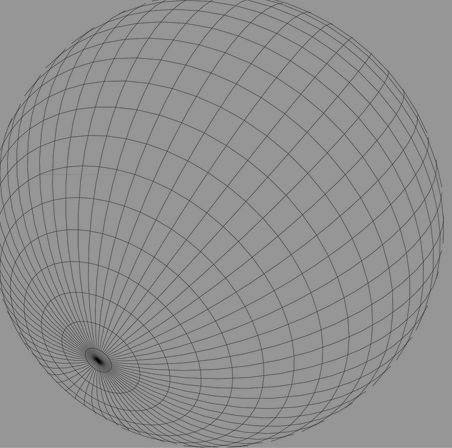

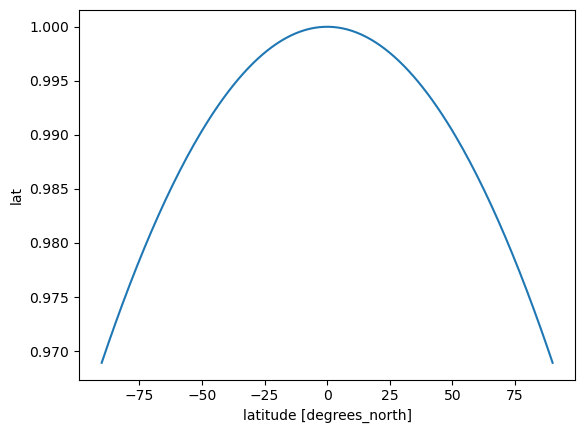

<xarray.Dataset>
Dimensions:    (lon: 288, time: 1980, member_id: 1)
Coordinates:
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) datetime64[ns] 1850-01-15T12:00:00 ... 2014-12-15T12:00:00
  * member_id  (member_id) object 'r1i1p1f1'
Data variables:
    od550aer   (member_id, time, lon) float64 dask.array<chunksize=(1, 307, 288), meta=np.ndarray>

In [75]:
latitudes = ds_cesm['lat']
weights = np.cos(latitudes/360)
ds_cesm_weighted_mean = ds_cesm.weighted(weights).mean('lat')
# show the weights: 
weights.plot(); plt.show()

ds_cesm_weighted_mean 

#### Create e.g. yearly averages:

The method 'resample' will group the data in periods in time. You can use it like this (the 'Y' stands for year, if you want other periods, you could do 'D' for day, 'M' for month', or '10Y' for 10 years):

In [76]:
ds_cesm_weighted_mean.resample(time='Y').mean(['time','lon'])

<xarray.Dataset>
Dimensions:    (member_id: 1, time: 165)
Coordinates:
  * member_id  (member_id) object 'r1i1p1f1'
  * time       (time) datetime64[ns] 1850-12-31 1851-12-31 ... 2014-12-31
Data variables:
    od550aer   (time, member_id) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>

Notice how the resample is followed by .mean()? The function added after resampel will be performed on the groups in question. In this case it results in yearly mean values. Let's now add the yearly mean values to the plot

### Plotting: 

#### Line plot

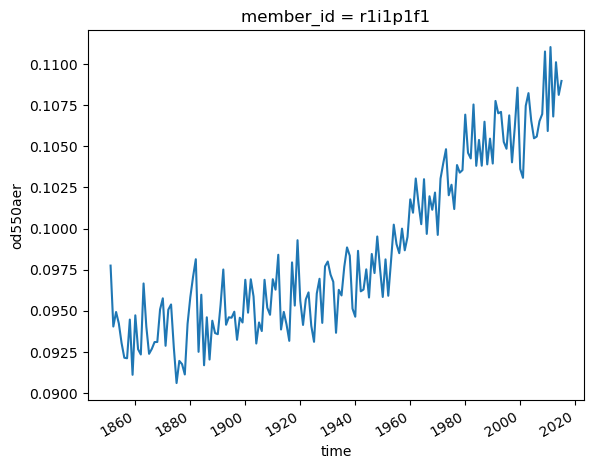

In [81]:
ds_mean = ds_cesm_weighted_mean.resample(time='Y').mean(['time','lon'])

ds_mean['od550aer'].plot()

### Surface: 

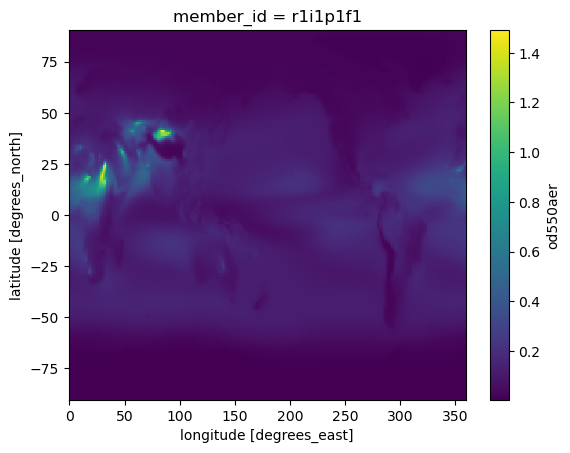

In [89]:
ds_mean = ds_cesm.mean(['time'])

ds_mean['od550aer'].plot()

### With map

In [103]:
import cartopy.crs as ccrs
def plot_with_map(da, **plt_kwrgs):
    p = da.plot(
    subplot_kws=dict(projection=ccrs.PlateCarree(),
    transform=ccrs.PlateCarree(),**plt_kwrgs)
    )
    p.axes.set_global()
    p.axes.coastlines(color='w')
    return p

In [104]:
plot_with_map(ds_mean['od550aer'], cmap='Reds')

AttributeError: GeoAxes.set() got an unexpected keyword argument 'cmap'

<Figure size 640x480 with 0 Axes>

Notice how the resulting dataset only contains time as a dimension? (And bnds, but we will not look at this) 

In [ ]:
ds_mean

### 1.5.3. Very quick plotting:

When you want to look at a specific variable in a dataset, you write 
```python
ds['name_of_variable']
```
followed by whatever operation you want. 

We may now try to plot the variable:

In [ ]:
ds_mean['tas_mean'].plot()

Now we can adjust the plot by including other setting:

In [ ]:
import matplotlib.pyplot as plt 

ds_mean['tas_mean'].plot(
    marker='.',  # makes dots for eacch datapoint
    linewidth=0, # removes the line between the datapoints
    alpha = .2,  # makes the datapoints sea-through (lower alpha, more see through)
    label='Temperature [$^\circ$C] (the label of the data)',
)
plt.title('Here goes the title of the plot')
plt.ylabel('Temperature anomaly') # label on the y axis
plt.legend() # makes the plocct legend appear

### 1.5.4. Resample and rolling: make yearly averages and rolling averages

Notice how the data above is very noisy? Often in climate data, we want to look at yearly or decadal averages or do a rolling average. 


The method 'resample' will group the data in periods in time. You can use it like this (the 'Y' stands for year, if you want other periods, you could do 'D' for day, 'M' for month', or '10Y' for 10 years):

In [ ]:
ds_yearly = ds_mean.resample(time = 'Y').mean()

Notice how the resample is followed by .mean()? The function added after resampel will be performed on the groups in question. In this case it results in yearly mean values. Let's now add the yearly mean values to the plot

In [ ]:
import matplotlib.pyplot as plt 

ds_mean['tas_mean'].plot(
    marker='.',  # makes dots for eacch datapoint
    linewidth=0, # removes the line between the datapoints
    alpha = .2,  # makes the datapoints sea-through (lower alpha, more see through)
    label='Monthly data [$^\circ$C]',
)

ds_yearly['tas_mean'].plot(
    # marker='.',  # makes dots for eacch datapoint
    linewidth=2, # removes the line between the datapoints
    alpha = 1,  # makes the datapoints sea-through (lower alpha, more see through)
    label='Yearly mean',
)
plt.title('Here goes the title of the plot')
plt.ylabel('Temperature anomaly') # label on the y axis
plt.legend() # makes the plot legend appear

Finally let's do a 10 year rolling mean: 



In [ ]:
ds_rolling = ds_yearly.rolling(
    time = 10, # number of points in rolling window
    center= True # sets the new time label in the midle of the window
).mean() # this is the operation performed on the rolling window

In [ ]:
import matplotlib.pyplot as plt 

ds_mean['tas_mean'].plot(
    marker='.',  # makes dots for eacch datapoint
    linewidth=0, # removes the line between the datapoints
    alpha = .2,  # makes the datapoints sea-through (lower alpha, more see through)
    label='Monthly data [$^\circ$C]',
)

ds_yearly['tas_mean'].plot(
    # marker='.',  # makes dots for eacch datapoint
    linewidth=2, # removes the line between the datapoints
    alpha = 1,  # makes the datapoints sea-through (lower alpha, more see through)
    label='Yearly mean',
)


ds_rolling['tas_mean'].plot(
    # marker='.',  # makes dots for eacch datapoint
    linewidth=2, # removes the line between the datapoints
    alpha = 1,  # makes the datapoints sea-through (lower alpha, more see through)
    label='10 year rolling mean',
)

plt.title('Here goes the title of the plot')
plt.ylabel('Temperature anomaly') # label on the y axis
plt.legend() # makes the plot legend appear